# SCRAPPING CON BEAUTIFUL SOUP

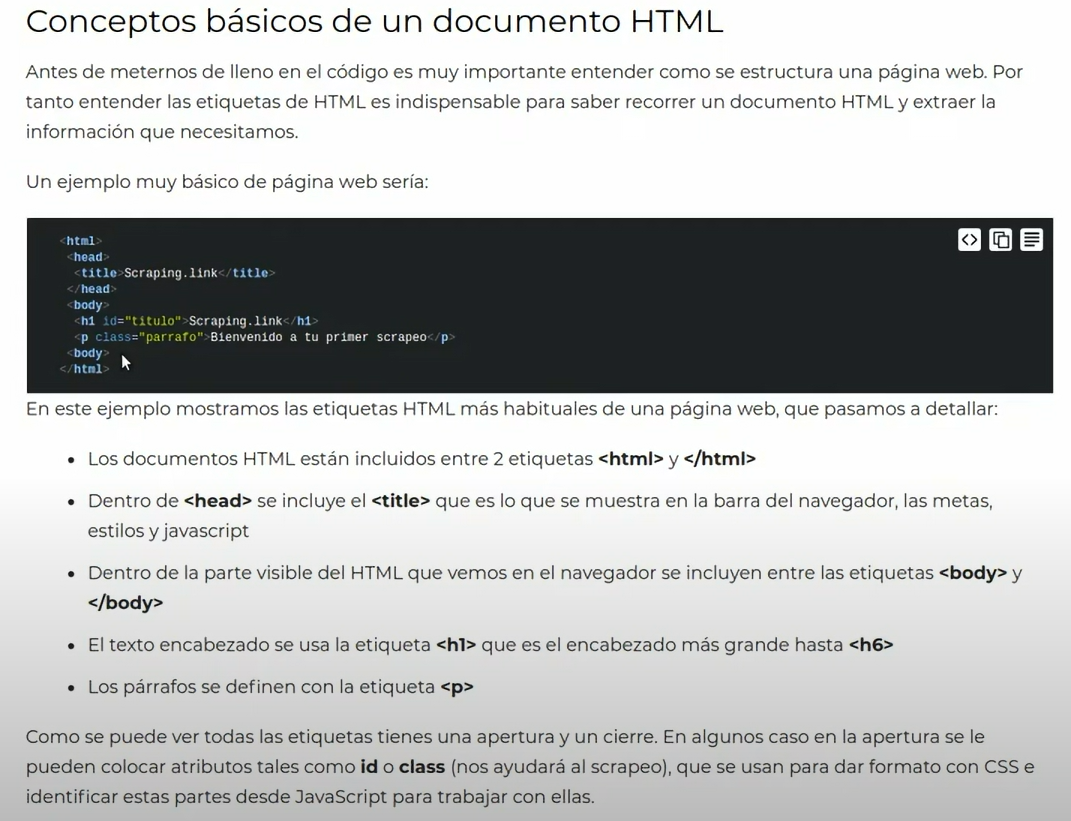


In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
page = requests.get("https://parascrapear.com/")   #peticion get para extraer el html de la url
soup = BeautifulSoup(page.text, "html.parser") 

Ahora necesitamos inspeccionar el documento HTML. Desde Chrome con pinchar en el segundo botón encima de la primera frase y darle a la opción «Inspeccionar» se nos abrirá lo que vemos en la siguiente captura. Como podemos ver cada frase está dentro de un blockquote y concretamente la frase la engloba una etiqueta <q> y </q>, para la categoría está en una etiqueta con class=»cat» y al autor le pasa lo mismo su etiqueta tiene la class=»author».

In [6]:
blockquote_items = soup.find_all('blockquote')  #creamos este array con todos los blockquote

for blockquote in blockquote_items:        
    autor = blockquote.find(class_='author').text
    categoria = blockquote.find(class_='cat').text
    frase = blockquote.find('q').text

    print([autor, categoria, frase])

['Blaise Pascal', 'Sociedad', 'Prefiero equivocarme creyendo en un Dios que no existe, que equivocarme no creyendo en un Dios que existe. Porque si después no hay nada, evidentemente nunca lo sabré, cuando me hunda en la nada eterna; pero si hay algo, si hay Alguien, tendré que dar cuenta de mi actitud de rechazo.']
['Jean Jacques Rousseau', 'Sociedad', 'El hombre ha nacido libre y por doquiera se encuentra sujeto con cadenas.']
['Blaise Pascal', 'Naturaleza', 'Nuestra naturaleza está en movimiento. El reposo absoluto es la muerte.']
['Mahatma Gandhi', 'Defectos', 'Quisiera sufrir todas las humillaciones, todas las torturas, el ostracismo absoluto y hasta la muerte, para impedir la violencia.']
['Gilbert Keith Chesterton', 'Miscelánea', 'La única simplicidad que vale la pena de conservar es la del corazón, la simplicidad que acepta y goza.']
['Goethe', 'Pensamiento y razón', 'Las ideas audaces son como piezas de ajedrez. Pueden ser vencidas, pero también pueden iniciar una partida vict

Por lo que vamos recorrer todos los blockquote y después dentro de cada uno extraer la frase, categoría y autor, como podemos ver en el siguiente código:

In [8]:
import pandas as pd
from bs4 import BeautifulSoup

# Suponiendo que tienes tu variable 'soup' con el contenido de la página HTML
sblockquote_items = soup.find_all('blockquote')  # encontramos todos los blockquote

# Lista para almacenar los datos extraídos
data = []

# Extraemos los datos de cada blockquote
for blockquote in blockquote_items:        
    autor = blockquote.find(class_='author').text.strip() if blockquote.find(class_='author') else 'Desconocido'
    categoria = blockquote.find(class_='cat').text.strip() if blockquote.find(class_='cat') else 'Sin categoría'
    frase = blockquote.find('q').text.strip() if blockquote.find('q') else 'Sin frase'

    # Añadimos los datos a la lista
    data.append([autor, categoria, frase])

# Convertimos la lista en un DataFrame
df = pd.DataFrame(data, columns=['Autor', 'Categoría', 'Frase'])

# Mostramos el DataFrame
df


,Autor,Categoría,Frase
0,Blaise Pascal,Sociedad,Prefiero equivocarme creyendo en un Dios que n...
1,Jean Jacques Rousseau,Sociedad,El hombre ha nacido libre y por doquiera se en...
2,Blaise Pascal,Naturaleza,Nuestra naturaleza está en movimiento. El repo...
3,Mahatma Gandhi,Defectos,"Quisiera sufrir todas las humillaciones, todas..."
4,Gilbert Keith Chesterton,Miscelánea,La única simplicidad que vale la pena de conse...
5,Goethe,Pensamiento y razón,Las ideas audaces son como piezas de ajedrez. ...
6,Emerson,Miscelánea,No me dejes caer en el vulgar error de soñar q...
7,Friedrich Nietzsche,Sociedad,Un político divide a las personas en dos grupo...
8,Platón,Sociedad,El más importante y principal negocio público ...
9,Jorge Luis Borges,Arte,La literatura no es otra cosa que un sueño dir...


# OTRO EJEMPLO

La pagina esta dividida en 3: el titulo de la pelicula, la descripcion de la pelicula y el plot o guion

In [11]:
# Defino la pagina de la cual vamos a extraer la data
website = 'https://subslikescript.com/movie/Titanic-120338'
#respuesta de la pagina a la solicitud de datos
result = requests.get(website)
#Obtenemos el texto de la solicitud
content = result.text
#creamos la variable para detectar elementos en la pagina web
soup = BeautifulSoup(content, 'lxml')

#MOSTRAMOS EL CODIGO HTML
print(soup.prettify())




<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-120598793-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-120598793-1');
  </script>
  <meta charset="utf-8"/>
  <title>
   Titanic (1997) Movie Script
 | Subs like Script
  </title>
  <meta content="    Read " created="" from="" movie="" name="description" script="" srt="" subtitles="" titanic=""/>
  <meta content="    transcript, movie, subtitles, scripts, film, video, media, subs, srt
" name="keywords"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="index, follow" name="robots"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <meta content="6PhBDLstRaRWnIZSj2lRiNk4eSo3sqUwthjYtiln" name="csrf-token"/>
  <meta content="6PhBDLstRaRWnIZSj2lRiNk4eS

Del codigo HTML que extraemos, vamos a buscar los datos que nos interesan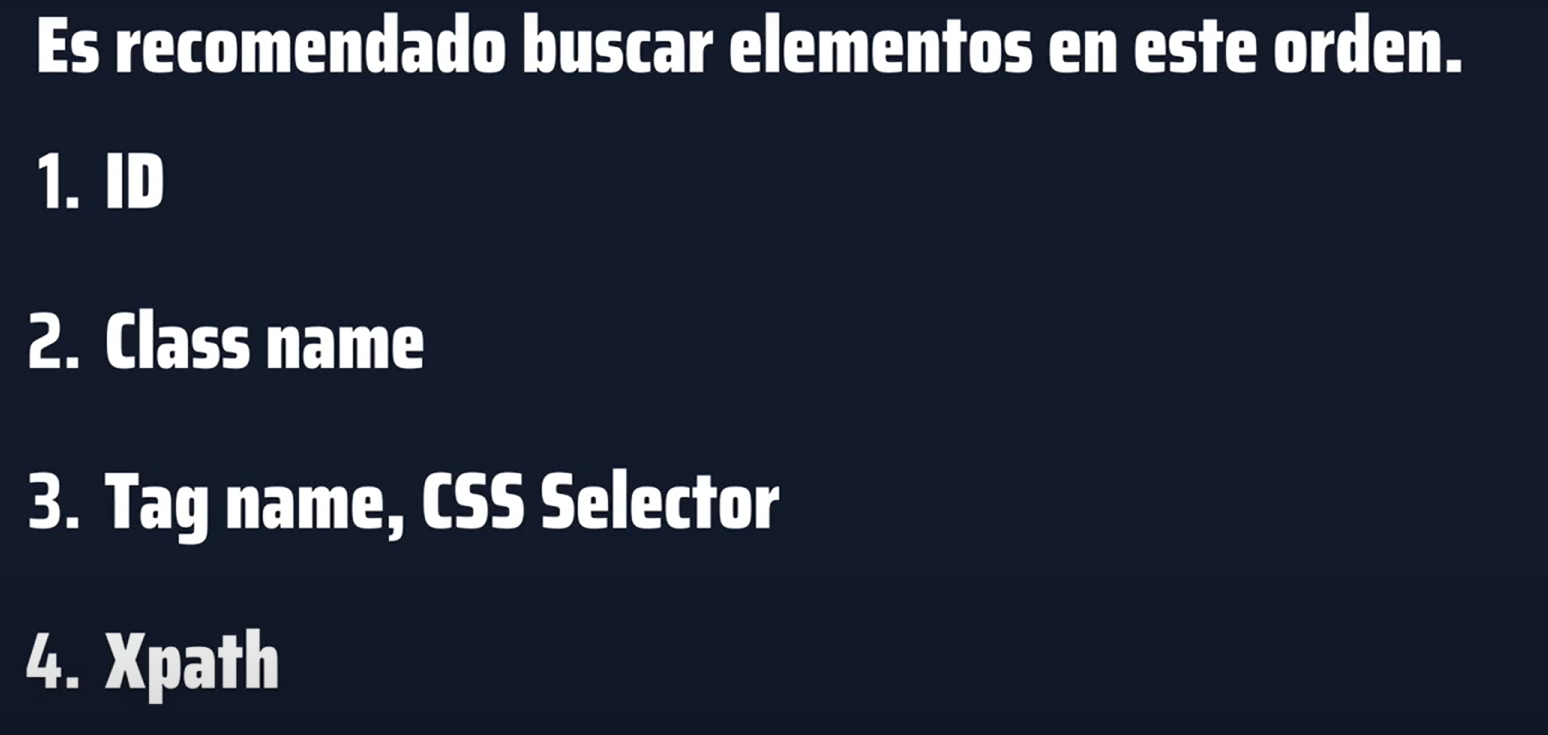



In [13]:
# Locate the box that contains title and transcript
#Localizamos mediante soup, el elemento articulo con su clase main-article
box = soup.find('article', class_='main-article')


#Localizamos el titulo de la pelicula
title = box.find('h1').get_text()

#Buscamos los datos del guion: 
transcript = box.find('div', class_='full-script').get_text(strip=True, separator=' ')

#Para exportar los datos a un archivo txt:
#with open(f'{title}.txt', 'w') as file:
#   file.write(transcript)

In [14]:
print(transcript)

13 meters. You should see it. Okay, take her up and over the bow rail. Mir 2, we're going over the bow. Stay with us. Okay, quiet. We're rolling. Seeing her coming out of the darkness like a ghost ship... still gets me every time. To see the sad ruin of the great ship sitting here... where she landed at 2:30 in the morning of April 15, 1912... after her long fall... from the world above. You are so full of shit, boss. Dive 6. Here we are again on the deck of Titanic. 21/2 miles down. 3,821 meters. The pressure outside is 31/2 tons per square inch. These windows are 9 inches thick. If they go, it's sayonara in two microseconds. All right, enough of that bullshit. Just put her down on the roof of the officers' quarters like yesterday. Mir 2, we're landing right over the Grand Staircase. You guys set to launch? Yeah, Brock. Launching Dunkin now. Go, Charlie. - All right, tether out. - Tether out. Okay, Brock, we're dropping down along the hull. Yeah, roger that. Okay, drop down and go int

# OTRA PAGINA DE PRUEBA

In [16]:
from bs4 import BeautifulSoup
import requests

url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')
soup

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-featu

Para saber la data que buscamos, debemos inspeccionar la pagina web

## FIND AND FIND ALL

In [18]:
soup.find_all("div")

[<div class="vector-header-container">
 <header class="vector-header mw-header">
 <div class="vector-header-start">
 <nav aria-label="Site" class="vector-main-menu-landmark">
 <div class="vector-dropdown vector-main-menu-dropdown vector-button-flush-left vector-button-flush-right" id="vector-main-menu-dropdown" title="Main menu">
 <input aria-haspopup="true" aria-label="Main menu" class="vector-dropdown-checkbox" data-event-name="ui.dropdown-vector-main-menu-dropdown" id="vector-main-menu-dropdown-checkbox" role="button" type="checkbox"/>
 <label aria-hidden="true" class="vector-dropdown-label cdx-button cdx-button--fake-button cdx-button--fake-button--enabled cdx-button--weight-quiet cdx-button--icon-only" for="vector-main-menu-dropdown-checkbox" id="vector-main-menu-dropdown-label"><span class="vector-icon mw-ui-icon-menu mw-ui-icon-wikimedia-menu"></span>
 <span class="vector-dropdown-label-text">Main menu</span>
 </label>
 <div class="vector-dropdown-content">
 <div class="vector-u

La diferencia entre find y findall es que find solo encuentra la primera div que le pasamos, en cambio findall encuentra todas

In [20]:
#Debemos especificar con atributos lo que vayamos a extraer
soup.find_all("p")

[<p>This list comprises the largest companies currently in the <a href="/wiki/United_States" title="United States">United States</a> by <a href="/wiki/Revenue" title="Revenue">revenue</a> as of 2024, according to the <a href="/wiki/Fortune_500" title="Fortune 500">Fortune 500</a> tally of companies and <a href="/wiki/Forbes" title="Forbes">Forbes</a>.
 </p>,
 <p>The Fortune 500 list of companies includes only <a href="/wiki/Public_company" title="Public company">publicly traded companies</a>, also including <a href="/wiki/Tax_inversion" title="Tax inversion">tax inversion</a> companies. There are also corporations having foundation in the United States, such as corporate headquarters, operational headquarters and independent subsidiaries. The list excludes large <a href="/wiki/Privately_held_company" title="Privately held company">privately held companies</a> such as <a href="/wiki/Cargill" title="Cargill">Cargill</a> and <a class="mw-redirect" href="/wiki/Koch_Industries" title="Koch 

In [57]:
#columns = soup.find_all("th")    ESTÁ MAL, ESTO NOS DEVUELVE TODAS LAS COLUMNAS, INCLUIDAS LAS DE LA SEGUNDA TAMBLA
table = soup.find_all('table')[0]
columns = table.find_all("th")
columns


[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [59]:
column_titles = [title.text.strip() for title in columns]
column_titles

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [61]:
import pandas as pd

df = pd.DataFrame(columns = column_titles)

df



,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


DEPUES DE INSPECCIONAR VEMOS QUE EL CONTENIDO DE LA TABLA SE ENCUENTRA EN EL ATRIBUTO "Tr"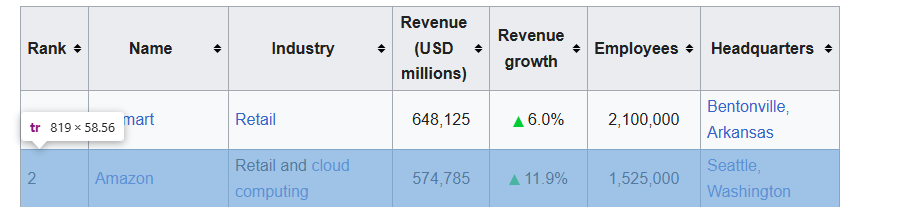

In [64]:
#table = soup.find_all('table')[1]
column_data = table.find_all("tr")




In [66]:

column_data = table.find_all("tr")


for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    #print(individual_row_data)
    length = len(df)
    df.loc[length] = individual_row_data

In [68]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


In [70]:
# EXPORTAR A CSV
#df.to_csv("FILE_PATH", index = False)